# Assignment 2


#### Bakhtiyar Garashov
##### Assignment is also available on [github](https://github.com/Bakhtiyar-Garashov/GeoPython2020)
This lesson we will focus on how to create geometries in Geopandas and how to re-project data and do some basic
geometric calculations.

- Don't forget to check out the hints for this assignment if you're having trouble.
- Scores on this exercise are out of **10 points**.

## Sections

- Problem 1: Create Polygon from lists of coordinates
- Problem 2: Points to map
- Problem 3: How long distance have the individual storms travelled?

### Problem 1: Create Polygon from lists of coordinates (2 points)

In the first problem you should:

 - create a Polygon out of the the x and y coordinates that are provided in the cell below
 - insert the polygon into a GeoDataFrame
 - save the Polygon into a Shapefile.
 - plot and save a figure out of the Polygon.

The follwoing cell has all necessary steps listed and also some hints are provided.

There are all together 6 steps that you need to fill to accomplish the problem 1.

Each step that you need to fill is marked with capital P -letter (P1 to P6).

C:\ProgramData\Miniconda3\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


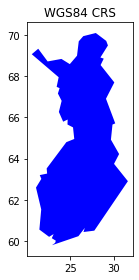

In [1]:
import pandas as pd
import geopandas as gpd
from fiona.crs import from_epsg
from shapely.geometry import Polygon,Point,LineString

# X -coordinates
xcoords = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Y -coordinates
ycoords = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

# P1. Create a list of x and y coordinate pairs out of xcoords and ycoords
# ------------------------------------------------------------------------
# Coordinate pair can be either a tuple or a list.
# The first coordinate pair in the 'coordpairs' -list should look like: (29.99671173095703, 63.748023986816406)
# Hint: you might want to iterate over items in the lists using a loop

# I am gonna use zip() method that makes easier to iterate over multiple collections

coordpairs=[]
for x_coord,y_coord in zip(xcoords,ycoords):
    coord_pair=(x_coord,y_coord)
    coordpairs.append(coord_pair)
       
# P2. Create a shapely Polygon using the 'coordpairs' -list
# ------------------------------------------------------------------------
polygon=Polygon(coordpairs)

# P3. Create an empty GeoDataFrame
# ---------------------------------
newdata = gpd.GeoDataFrame()

# P4. Insert our 'poly' -polygon into the 'geo' GeoDataFrame using a column name 'geometry'
# ------------------------------------------------------------------------------------------
# Hint: Take advantage of .loc -function
newdata.loc[0, 'geometry'] = polygon

# to be very correct, set the crs, if it is lat/lon coordinates we  may assume WGS84
newdata.crs = from_epsg(4326)

# P5. Save the GeoDataFrame into a new Shapefile called 'polygon.shp'
# --------------------------------------------------------------------
# Note: you do not need to define the coordinate reference system at this time
# Write the data into that Shapefile
out_file = "polygon.shp"

# Save to disk
newdata.to_file(out_file)

# P6. Plot the polygon using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure out of your plot and upload it to your GitHub repository.
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

# Plot the WGS84
newdata.plot(facecolor='blue');

# Add title
plt.title("WGS84 CRS");

# Remove empty white space around the plot
plt.tight_layout()

plt.savefig('output.png')


### Problem 2: Points to map (4 points)


The problem 2 this lesson continues the process that we started last lesson, i.e. creating geometric point -objects and putting them into a map.
Here our aim is to plot a set of x and y coordinates that we should read from the **Years.2015-2017.ibtracs_wmo.storms.north_atlantic.csv** comma separated file that contains following kind of data:

```

    Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
    2014356S08101,2015,4, SI, WA,KATE,2014-12-21 15:00:00, NR,-7.5,100.5,15.0,1007.0,bom,0.16899999999999998,0.828,main
    2014356S08101,2015,4, SI, WA,KATE,2014-12-21 18:00:00, NR,-7.71,100.63,15.0,1007.0,bom,0.16899999999999998,0.828,main
    2014356S08101,2015,4, SI, WA,KATE,2014-12-21 22:07:00, NR,-8.0,100.8,-1.0,-1.0,bom,-100.0,-100.0,main
```

The data has 1627 rows and consists of locations, times and addirional informations of tracked storms, hurricanes etc. in the North Atlantic for the years 2015-2017:

```
    +------------------+---------------------------------------------------------+
    | Column           | Description                                             |
    +==================+=========================================================+
    | Latitude         | y-coordinate of the tracked position                    |
    +------------------+---------------------------------------------------------+
    | Longitude        | x-coordinate of the tracked position                    |
    +------------------+---------------------------------------------------------+
    | Serial_Num       | a unique ID for each on-going storm                     |
    +------------------+---------------------------------------------------------+
    | Name             | A name assigned to a large individual storm             |
    +------------------+---------------------------------------------------------+
```
The data only contains storms for the North Atlantic. Also, names are assigned on a yearly basis and might or might not be used for different storms in different years.


- Download the data **Years.2015-2017.ibtracs_wmo.storms.north_atlantic.csv**
- Read the data into memory using Pandas
- Create an empty column called ``geometry`` where you will store shapely Point objects
- Iterate over the rows of the DataFrame and insert Point objects into the column geometry (for example, via apply or using .loc indexer to update the row, [see materials](https://kodu.ut.ee/~kmoch/geopython2020/L2/geopandas-basics.html#creating-geometries-into-a-geodataframe>)
- Convert that DataFrame into a GeoDataFrame, see hints
- set the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
- Save the data into a Shapefile called ``storm_track_positions.shp``


- download the the shapefile **world_lowres.zip**
- load it into a GeoDataFrame
- make sure that the world_lowres GeoDataframe in in the same coordinate reference system (reproject if necessary)
- Create a simple map plot of those points using the ``.plot()`` -function on top of the world_lowres countries. See lesson how to plot several GeoDataframes in one image. Save it as a png file (storm_track_positions.png).

C:\ProgramData\Miniconda3\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


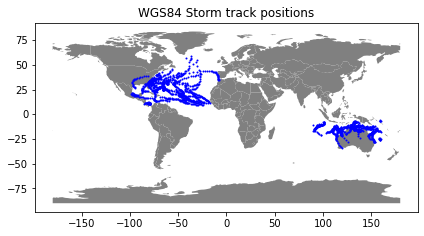

In [2]:
# reading data from csv via pandas
df = pd.read_csv('Years.2015-2017.ibtracs_wmo.storms.north_atlantic.csv', sep=',', encoding='latin1')

# function to make shapely point objects
def make_points(row):
    return Point(row['Longitude'],row['Latitude'])

# make a new geometry column and save point objects in it
df['geometry']=df.apply(make_points,axis=1)

# convert pandas df to geopandas df
geo_data = gpd.GeoDataFrame(df, geometry='geometry', crs=from_epsg(4326))

# Save to disk as shp file the geodataframe
out_file_name = "storm_track_positions.shp"
geo_data.to_file(out_file_name)

# load world shp into geodataframe
world_shp='world_lowres.shp'
world_lowres= gpd.read_file(world_shp)

# plot multiple datasets
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots()
world_lowres.plot(ax=ax,facecolor='gray')
geo_data.plot(ax=ax,facecolor='blue',markersize=1)

# Add title
plt.title("WGS84 Storm track positions")

# Remove empty white space around the plot
plt.tight_layout()

# save figure as png image
plt.savefig('storm_track_positions.png')


### Problem 3: How long distance individual storms have travelled? (4 points)


In this problem the aim is to calculate the distance in kilometers that the individual storms have travelled according to
their tracking points (distances in kilometers from first tracking to last tracking point along their tracked paths).

Write your codes into the same notebook for the previous problems.

In your code you should:

- Group the storms point tracking data by storm id
- Create an empty GeoDataFrame called ``movements``
- Set the CRS of the ``movements`` GeoDataFrame to ``EPSG:4326``

- For each storm in the group, do:
   - sort http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html the rows by timestamp
   - create LineString objects based on the points
   - add http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html the linestring geometry and the storm id (and name if you like) into the ``movements`` GeoDataFrame you created in the last step


- Save the new movements geodataframe into a Shapefile called ``storm_movements.shp``
- Create a simple map of the storm paths over the world_lowres countries again. Save it as a png file (storm_movements.png).


- Reproject the data from WGS84 into the EPSG:4087 <https://epsg.io/4087 WGS 84 / World Equidistant Cylindrical -projection to transform the data into a distance-preserving metric-based system.
- load world countries shapefile, reproject into same CRS and plot together with storm paths
- Calculate the lenghts of the storm lines into a new column called ``distance`` in ``movements`` GeoDataFrame.

2. Calculate the storm path distances again based on the EPSG:3857 https://epsg.io/3857 web mercator -projection? What do you observe?

In [ ]:
# Group the storms point tracking data by storm id

geo_data1=geo_data.sort_values(['ISO_time']).groupby('Serial_Num')

movements = gpd.GeoDataFrame()
movements.crs = from_epsg(4326)

lines_list=[]

for each in geo_data1.geometry:
    df=gpd.GeoDataFrame()
    storm_id=each[0]
    coords_each_line=[x for x in each[1]]
    
    if len(coords_each_line)>1:
        line=LineString(coords_each_line)
        lines_list.append({
            'id': storm_id,
            'geometry' : line})
    
movements = gpd.GeoDataFrame(lines_list)
movements.crs = from_epsg(4326)

# Save to disk as shp file the geodataframe
out_file_name = "storm_movements.shp"
movements.to_file(out_file_name)


# plot multiple datasets
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots()
world_lowres.plot(ax=ax,facecolor='gray')
movements.plot(ax=ax,markersize=1)

# Add title
plt.title("WGS84 Storm Movements")

# Remove empty white space around the plot
plt.tight_layout()

# save figure as png image
plt.savefig('storm_movements.png')




### Questions


Write your answers below the solved problems in your code file.
You should also print the answers to the questions in your code.

 - What was the shortest distance travelled in kilometers?
 - What was the mean distance travelled in kilometers?
 - What was the maximum distance travelled in kilometers?

### Optional task for advanced students (additional max 3 points)


1. Which storm(s) made landfall in the USA? Make appropriate geographic queries (e.g. PIP, touch or intersect) to find out which storm paths are passing over USA continental territory (``'name'=='United States of America'``).
2. Define a a customised ``Azimuthal Equi-Distant projection`` centered in the middle (centroid) of all the storms (tracking positions or paths) in order to re-calculate the distances even more correctly.

See lesson 2, where we recentered the European projection string definition.

```python

    from shapely.geometry import MultiPoint
    p = MultiPoint([v for v in geo_df['geometry'].values]).centroid
    print(p)
    POINT (-58.02241566920573 26.17170837867247)

```

```python

    proj4_txt = '+proj=aeqd +lat_0={} +lon_0={} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'.format(centre_lat, centre_lon)
    proj_data_new = data.to_crs(proj4_txt)
```

Exercise 2 hints
================


Hints regarding the storms csv dataset
------------------------------------------

- You are not supposed to manually work with the data (e.g. Excel or something)
- Reuse your "create_lineGeom" function from Exercise 1
- be defensive, so that either you get a valid line_string, or otherwise don't use that storms movement in the new movements geodataframe
- reuse your calculate lengths from exercise 1, as it is now in a metric-unit projected coordinate system, the lengths are already meaningful

Converting Pandas DataFrame into a GeoDataFrame
-----------------------------------------------

Quite often you are in a situation where you have read data e.g. from text file into a Pandas DataFrame where you have latitude and longitude columns representing the location of a record.

- Let's continue with the previous example and consider that we have a column where we have stored the shapely geometries:

```python

     >>> print(data)
         value  lat  lon     geometry
     0      0    2    4  POINT (4 2)
     1      5    1    6  POINT (6 1)
     2      2    6    1  POINT (1 6)
     3      6    6    3  POINT (3 6)
     4      5    5    1  POINT (1 5)

```

- Notice that now our data is still a Pandas **DataFrame**, not a GeoDataFrame:

```python

    >>> type(data)
    pandas.core.frame.DataFrame

```

We need to convert the DataFrame into a GeoDataFrame, so that we can e.g. save it into a Shapefile.
It is easily done by passing the DataFrame into a GeoDataFrame object.
Now we need to determine     which column contains the geometry information (needs to be always a column called 'geometry'),
and optionally we can also determine the coordinate reference system when creating the GeoDataFrame:

```python

    # Convert DataFrame into a GeoDataFrame (providing the "geomtry" column from the pandas dataframe explicitly for GeoPandas dataframe as the geometry per feature)
    geo = gpd.GeoDataFrame(data, geometry='geometry', crs=from_epsg(4326))

    >>> type(geo)
    geopandas.geodataframe.GeoDataFrame

    >>> geo.crs
    {'init': 'epsg:4326', 'no_defs': True}

```

Now we have converted Pandas DataFrame into a proper GeoDataFrame that we can export into a Shapefile for instance.


Different variants to join two list
-----------------------------------

- side note: checking the length of a list, how many elements it contains

```python

    my_length = len(list_1)

```

- via a dataframe building column-wise:

```python

    # dataframe from dict { 'column_name': list_of_data ... }
    # if you have several lists, ideally they should be of same length
    dfp = pd.DataFrame( {'xcoords': list_1, 'ycoords': list_2} )

    def make_pair(row):
        return (row['xcoords'], row['ycoords'])

    dfp['coord_pairs'] = dfp.apply(make_pair, axis=1)
    dfp['coord_pairs'].tolist()

```

- manual iterating over list positioning:

```python

    list_length = len(list_1)
    coordpairs = []
    for x in range(0, list_length):
        coordpairs.append((list_1[i], list_2[i]))
```

- the special Python zip method (imagine a zipper):

```python

    # zipped variable here is in a state of waiting to be iterated over, zipped itself is not yet a list again
    zipped = zip(list_1, list_2)
    # trying to make a python list out of something list-like or something that can be iterated over
    coord_list = list(zipped)
```

Sorting and Adding "advanced functions usage on the dataframes
--------------------------------------------------------------

- use the [sort_values sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) to sort the rows by timestamp
- In this case, we actually want to sort and work the "whole" thing, and therefore use axis=0 (NOT axis=1 like with functions apply) or just omit axis keyword should do just fine.
- no need to translate the "text" based timestamp into a date format, because the "timestamp" is formatted iso, year first then month etc, text or string-wise sorting is working ok
- in order to [add/append](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) new rows to our new empty dataframe - here are two examples, but in both you ideally collect the new rows at first in a separate list:

```python

    # version 1:
    # append row by row, gives you more control based on how you stored the intermediate new rows in your list (e.g. as tuple or [] pair)
    for idx in range(0, len(new_rows)):
        newdata = newdata.append({'Serial_Num': new_rows[idx][0], 'geometry': new_rows[idx][1]}, ignore_index=True)


    # version 2:
    # directly create a temporary dataframe and use collected rows-list;
    # the rows-list needs to be a "list of lists", where each "sublists" consists of the entries for each row
    temp_df = pd.DataFrame(new_rows, columns=['Serial_Num','geometry'])
    # and then "just" append the temp dataframe onto the other dataframe
    newdata = newdata.append(temp_df, sort=False)
```

Some Do's and Dont's recommendations for Python coding
------------------------------------------------------

- DON'T

```python

    def function():
        # these return the actual strings that you put here
        return "Error: LineString or Polygon geometries required!"
        # or
        return("Error! Please insert a list of Shapely Points or coordinate tuples!")

    length=function(xyz)
    print(length)
```

- DO

```python

    def function():
        # ...
        print("Error: LineString or Polygon geometries required!")
        # no return statement or return explicitly None
        return None
```

- also...

```python

    # don't return in brackets
    return (polygon)
    # do
    return polygon
```

- Don't mix/mistake tuple for lists

```python

    # tuple
    PList = (point1, point2)

    # list
    PList = [point1, point2]
```

- do not make spaces before the brackets, for readability, but after commas. All work though :-) but for style

```python

    # no
    Point (x, y)
    # no
    Point(x,y)
    # yes, ideal
    Point(x, y)
```

- variable and function names, lower case first letters is better

```python

    # no
    Point1 = createPointGeom(1.5,3.2)
    # no
    point1 = CreatePointGeom(1.5,3.2)

    # yes
    point1 = createPointGeom(1.5, 3.2)
    point1 = create_point_geom(1.5, 3.2)
```

- reserved words, it works, but it's dangerous and might be misleading

```

    def getCentroid(object):
        return object.centroid
```